# 十一、概率论与数理统计

## 1.随机变量的概率计算和数字特征

### 1.1随机变量的概率计算

**例** 设$X \sim N\left(3,5^{2}\right)$
(1)求$P\{2<X<6\}$；
(2)确定$c$，使得$P\{-3 c<X<2 c\}=0.6$.

In [ ]:
from scipy.stats import norm
from scipy.optimize import fsolve

print('p=', norm.cdf(6, 3, 5)-norm.cdf(2, 3, 5)) # cdf: Cumulative distribution function
f = lambda c: norm.cdf(2*c, 3, 5) - norm.cdf(-3*c, 3, 5) - 0.6
print('c=', fsolve(f, 0))

p= 0.3050065916890295
c= [2.29103356]


**定义1 $\alpha$分位数** 若连续型随机变量$X$的分布函数为$F(x)$，对于$0<$ $\alpha<1$，若$x_{\alpha}$使得$P\left\{X \leqslant x_{\alpha}\right\}=\alpha$，则称 $x_{\alpha}$为这个分布的$\alpha$分位数。若$F(x)$的反函数$F^{-1}(x)$存在，则有$x_{\alpha}=F^{-1}(\alpha)$。
**定义2 上$\alpha$分位数** 若连续型随机变量$X$的分布函数为$F(x)$，对于$0<\alpha<1$，若$\tilde{x}_{\alpha}$使得$P\left\{X>\tilde{x}_{\alpha}\right\}=\alpha$，则称$\tilde{x}_{\alpha}$为这个分布的上$\alpha$分位数。若$F(x)$的反函数$F^{-1}(x)$存在，则$\tilde{x}_{\alpha}=F^{-1}(1-\alpha)$。
**例** 设$X \sim N(0,1)$，若$z_{\alpha}$满足条件$P\left\{X>z_{\alpha}\right\}=\alpha, 0<\alpha<1$，则称$z_{\alpha}$为标准正态分布的上$\alpha$分位数。试计算几个常用的$z_{\alpha}$的值，并画出$z_{0.1}$的示意图。计算得到几个常用的$z_{\alpha}$的值见下表，$z_{0.1}$的示意图见下图。
表 标准正态分布的上 $\alpha$ 分位数的值
\begin{array}{cllllll}
\hline \alpha & 0.001 & 0.005 & 0.01 & 0.025 & 0.05 & 0.10 \\
\hline z_{\alpha} & 3.0902 & 2.5758 & 2.3263 & 1.9600 & 1.6449 & 1.2816 \\
\hline
\end{array}

上alpha分位数分别为： [3.09023231 2.5758293  2.32634787 1.95996398 1.64485363 1.28155157]


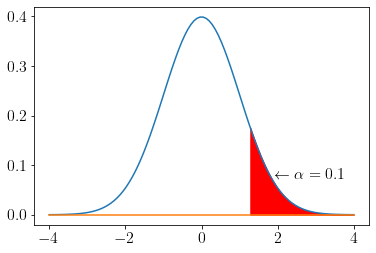

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

alpha = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.10])
za = norm.ppf(1-alpha, 0, 1) # 求上alpha分位数; ppf: Percent point function (inverse of `cdf`) at q of the given RV.
print("上alpha分位数分别为：", za)
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, 0, 1) # pdf: Probability density function at x of the given RV.

plt.rc('font', size=16)
plt.rc('text', usetex=True)
plt.plot(x, y) # 画标准正态分布密度曲线
x2 = np.linspace(za[-1], 4, 100)
y2 = norm.pdf(x2)
y1 = [0]*len(x2)
plt.fill_between(x2, y1, y2, color='r') # y1, y2对应的点之间填充
plt.plot([-4, 4], [0, 0]) # 画水平线
plt.text(1.9, 0.07, r"$\leftarrow \alpha=0.1$") # 标注
plt.show()

### 1.2随机变量的数字特征

**定义3** 设随机变量 $X$ 的分布律为
$$
P\left\{X=x_{k}\right\}=p_{k}, \quad k=1,2, \cdots
$$
若级数 $\sum_{k=1}^{\infty} x_{k} p_{k}$ 绝对收敛，则称级数 $\sum_{k=1}^{\infty} x_{k} p_{k}$ 的和为随机变量 $X$ 的**数学期望**，记为 $E(X)$，即
$$
E(X)=\sum_{k=1}^{\infty} x_{k} p_{k}
$$
设连续型随机变量 $X$ 的概率密度为 $f(x)$, 若积分 $\int_{-\infty}^{+\infty} x f(x) d x$ 绝对收敛, 则称积分 $\int_{-\infty}^{+\infty} x f(x) d x$ 的值为随机变量 $X$ 的数学期望, 记为 $E(X)$. 即
$$
E(X)=\int_{-\infty}^{+\infty} x f(x) d x
$$
**定义4** 设 $X$ 是一个随机变量, 若 $E\left\{[X-E(X)]^{2}\right\}$ 存在, 则称 $E\{[X-$ $\left.E(X)]^{2}\right\}$ 为 $X$ 的**方差**, 记为 $D(X)$ 或 $\operatorname{Var}(X)$, 即
$$
D(X)=\operatorname{Var}(X)=E\left\{[X-E(X)]^{2}\right\}
$$
$\sigma(x)=\sqrt{D(X)}$, 称为**标准差**或**均方差**。
由定义4 知, 方差实际上就是随机变量 $X$ 的函数 $g(X)=(X-E(X))^{2}$ 的数学期望.
**定义5** 随机变量 $X$ 的**偏度**和**峰度**指的是 $X$ 的标准化变量 $(X-E(X))$ / $\sqrt{D(X)}$ 的三阶中心矩和四阶中心矩:
$$
\begin{aligned}
&\nu_{1}=E\left[\left(\frac{X-E(X)}{\sqrt{D(X)}}\right)^{3}\right]=\frac{E\left[(X-E(X))^{3}\right]}{(D(X))^{3 / 2}}, \\
&\nu_{2}=E\left[\left(\frac{X-E(X)}{\sqrt{D(X)}}\right)^{4}\right]=\frac{E\left[(X-E(X))^{4}\right]}{(D(X))^{2}} .
\end{aligned}
$$
**定义6** $E\{[X-E(X)][Y-E(Y)]\}$ 称为随机变量 $X$ 与 $Y$ 的**协方差**. 记为 $\operatorname{Cov}(X, Y)$, 即
$$
\operatorname{Cov}(X, Y)=E\{[X-E(X)][Y-E(Y)]\}
$$
而
$$
\rho_{X Y}=\frac{\operatorname{Cov}(X, Y)}{\sqrt{D(X)} \sqrt{D(Y)}}
$$
称为随机变量 $X$ 与 $Y$ 的**相关系数**.
**定义7** 设 $X$ 和 $Y$ 是随机变量, 若 $E\left(X^{k}\right), k=1,2, \cdots$ 存在, 称它为 $X$ 的 $k$ 阶原点矩, 简称** $k$ 阶矩**.
若 $E\left\{[X-E(X)]^{k}\right\}, k=2,3, \cdots$ 存在, 称它为 $X$ 的** $k$ 阶中心矩**.
若 $E\left(X^{k} Y^{l}\right), k, l=1,2, \cdots$ 存在, 称它为 $X$ 和 $Y$ 的** $k+l$ 阶混合矩**.
若 $E\left\{[X-E(X)]^{k}[Y-E(Y)]^{l}\right\}, k, l=1,2, \cdots$ 存在, 称它为 $X$ 和 $Y$ 的** $k+l$ 阶混合中心矩**.
**定义8** 设 $n$ 维随机变量 $\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 的二阶混合中心矩
$$
c_{i j}=\operatorname{Cov}\left(X_{i}, X_{j}\right)=E\left\{\left[X_{i}-E\left(X_{i}\right)\right]\left[X_{j}-E\left(X_{j}\right)\right]\right\}, \quad i, j=1,2, \cdots, n
$$
都存在, 则称矩阵
$$
\boldsymbol{C}=\left[\begin{array}{cccc}
c_{11} & c_{12} & \cdots & c_{1 n} \\
c_{21} & c_{22} & \cdots & c_{2 n} \\
\vdots & \vdots & & \vdots \\
c_{n 1} & c_{n 2} & \cdots & c_{n n}
\end{array}\right]
$$
为 $n$ 维随机变量 $\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 的**协方差矩阵**. 由于 $c_{i j}=c_{j i}(i, j=1,2, \cdots, n)$, 因而上述协方差矩阵是一个对称矩阵.
概率论与数理统计教科书一般都给出如下表所列的随机变量数字特征, 但没有给出偏度和峰度. 下面用 Python 计算随机变量的数字特征.
表 重要分布的数学期望和方差
\begin{array}{cccc}
\hline 分布 & 参数 & 数学期望 & 方差 \\
\hline 两点分布 b(1, p) & 0<p<1 & p & p(1-p) \\
二项分布 b(n, p) & n \geqslant 1,0<p<1 & n p & n p(1-p) \\
泊松分布 \pi(\lambda) & \lambda>0 & \lambda & \lambda \\
均匀分布 U(a, b) & a<b & (a+b) / 2 & (b-a)^{2} / 12 \\
指数分布 \exp (\theta) & \theta>0 & \theta & \theta^{2} \\
正态分布 N\left(\mu, \sigma^{2}\right) & \mu, \sigma>0 & \mu & \sigma^{2} \\
\hline
\end{array}

### 1.3随机变量数字特征计算及应用

**例** 计算二项分布$b(20, 0.8)$的均值和方差

In [ ]:
from scipy.stats import binom

n = 20
p = 0.8
print("期望和方差分别为：", binom.stats(n, p))

期望和方差分别为： (array(16.), array(3.2))


**例** 计算二项分布$b(20, 0.8)$的均值、方差、偏度和峰度

In [ ]:
from scipy.stats import binom

n, p = 20, 0.8
print("所求的数字特征为：", binom.stats(n, p, moments='mvsk')) # m:mean v:variance s:skew k:kurtosis

所求的数字特征为： (array(16.), array(3.2), array(-0.3354102), array(0.0125))


**例** 某路政部门负责城市某条道路的路灯维护. 更换路灯时, 需要专用云梯车进行线路检测和更换灯泡, 向相应的管理部门提出电力使用和道路管制申请, 还要向雇用的各类人员支付报酬等, 这些工作需要的费用往往比灯泡本身的费用更高, 灯泡坏 1 个换 1 个的办法是不可取的. 根据多年的经验, 他们采取整批更换的策略, 即到一定的时间, 所有灯泡无论好与坏全部更换.
上级管理部门通过监察灯泡是否正常工作对路政部门进行管理, 一旦出现 1 个 灯泡不亮, 管理部门就会按照折合计时对他们进行罚款.
现抽查某品牌灯泡 200 个, 假设其寿命服从 $N\left(4000,100^{2}\right)$ (单位: h) 分布, 每个灯泡的更换费用 (包括灯泡的成本和安装时分推到每个灯泡的费用) 为 80 元, 管理部门对每个不亮的灯泡制订的惩罚费用为 $0.02$ 元 $/ \mathrm{h}$, 应多长时间进行一次灯泡的全部更换.
**解** 记每个灯泡的更换费用为 $a$, 管理部门对每个不亮灯泡单位时间的罚款为 $b$. 记灯泡寿命的概率密度函数为 $f(x)$, 更换周期为 $T$, 灯泡总数为 $K$, 则更换灯泡的费用为 $K a$, 承受的罚款为
$$
K b \int_{-\infty}^{T}(T-x) f(x) d x
$$
一个更换周期内的总费用是两者之和. 路政部门考虑的目标函数是单位时间内的平均费用, 即
$$
F(T)=\frac{K a+K b \int_{-\infty}^{T}(T-x) f(x) d x}{T}
$$
为得到最佳更换周期, 求 $T$ 使 $F(T)$ 最小. 令 $\frac{d F}{d T}=0$, 得
\begin{equation}
\int_{-\infty}^{T} x f(x) d x=\frac{a}{b}
\tag{(1)}
\end{equation}
记灯泡寿命的分布函数为 $G(x)$, 由式(1)代入正态分布的概率密度函数并进行分布积分, 得到
$$
\mu G(T)-\sigma^{2} f(T)=\frac{a}{b}
$$
其中参数 $\mu, \sigma^{2}$ 为正态分布 $N\left(\mu, \sigma^{2}\right)$ 中的均值和方差.

In [ ]:
"""
下面程序将使用二分法求解，由于涉及无限区间积分无法直接调用scipy.integrate的库函数，而用符号函数求解速度太慢
"""
from scipy.integrate import quad
import numpy as np

a = 80
b = 0.02
BD = a/b
mu = 400
s = 100

y = lambda x: x*np.exp(-(x-mu)**2/(2*s**2))/np.sqrt(2*np.pi)/s # 正态分布密度函数

I = 0
x1 = 0
x2 = 1000
while np.abs(I - BD) > 1E-16:
    c = (x1 + x2)/2
    I = quad(y, -10000, c)[0] # 由3sigma准则这里积分下限取为-10000， 取零效果一样
    if I > BD:
        x2 = c
    else:
        x1 = c
print("最佳更换周期为：", c)

## 2.描述性统计和统计图

### 2.1统计的基础知识
数理统计研究的对象是受随机因素影响的数据, 简称**统计**. 统计是以概率论为基础的一门应用科学. 数据样本少则几个, 多则成千上万个, 人们希望能用少数几个包含最多相关信息的数据来体现所研究对象的规律. **描述性统计**就是搜集、整理、加工和分析统计数据, 使之系统化、条理化, 以显示出数据资料的趋势、特征和数量关系. 它是统计推断的基础, 实用性较强, 在统计工作中经常使用. 下面介绍统计的基本概念.
#### 2.2.1样本和总体
在数理统计中, 把所研究的对象的全体称为**总体**. 通常指研究对象的某项数量指标, 一般记为 $X$. 如全体在校生的身高 $X$, 某批灯泡的寿命 $Y$. 把总体的每一个基本单位称为**个体**. 从总体 $X$ 中抽出若干个个体称为**样本**, 一般记为 $X_{1}, X_{2}, \cdots, X_{n}$, $n$ 称为**样本容量**. 而对这 $n$ 个个体的一次具体的观察结果记为 $x_{1}, x_{2}, \cdots, x_{n}$, 它是完全确定的一组数值, 但又随着每次抽样观察而改变, 称 $x_{1}, x_{2}, \cdots, x_{n}$ 为**样本观察值**. 统计的任务是从样本观察值出发, 去推断总体的情况——总体分布.
#### 2.2.2频数表和直方图
一组样本观察值虽然包含了总体的信息, 但往往是杂乱无章的, 做出它的频数表和直方图, 可以看作是对这组样本值的一个初步整理和直观描述. 将数据的取值范围划分为若干个区间, 然后统计这组样本值在每个区间中出现的次数, 称为频数, 由此得到一个**频数表**. 以数据的取值为横坐标, 频数或频率 (频率 $=$ 频数/样本容量) 为纵坐标, 画出一个阶梯形的图, 称为**直方图**.
#### 2.2.3统计量
样本是进行分析和推断的起点, 但实际上并不直接用样本进行推断, 而需对样本进行加工和提炼, 将分散于样本中的信息集中起来, 为此引入统计量的概念. **统计量**是不含未知参数的样本的函数.
下面介绍几种常用的统计量, 以后不区分统计量和统计量的观察值, 统称为统计量. 设有一个容量为 $n$ 的样本 (也不区分样本和样本观察值, 统称为样本), 记为 $x_{1}, x_{2}, \cdots, x_{n}$.
##### (1)表示位置的统计量——算术平均值和中位数
算术平均值 (简称均值) 描述数据取值的平均位置, 记作 $\bar{x}$,
$$
\overline{\bar{x}}=\frac{1}{n} \sum_{i=1}^{n} x_{i}
$$
中位数是将数据由小到大排序后位于中间位置的那个数值, 当 $n$ 为偶数时, 取值为中间两数的算术平均值.
##### (2)表示变异程度的统计量——标准差、方差和极差
标准差 $s$ 定义为
$$
s=\left[\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right]^{\frac{1}{2}}
$$
它是各个数据与均值偏离程度的度量, 这种偏离不妨称为变异.
方差是标准差的平方 $s^{2}$.
极差是 $x_{1}, x_{2}, \cdots, x_{n}$ 的最大值与最小值之差.
##### (3)表示分布形状的统计量——偏度和峰度
偏度
$$
\nu_{1}=\frac{1}{ns^{3}} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{3} .
$$
峰度
$$
\nu_{2}=\frac{1}{ns^{4}} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{4} .
$$
偏度反映分布的对称性, $\nu_{1}>0$ 称为右偏态, 此时数据位于均值右边的比位于左边的多; $\nu_{1}<0$ 称为左偏态, 情况相反; 而 $\nu_{1}$ 接近 0 则可认为分布是对称的.
峰度 $\nu_{2}$ 是分布形状的另一种度量, 正态分布的峰度为 3 , 若 $\nu_{2}$ 比 3 大得多, 表示分布有沉重的尾巴, 说明样本中含有较多远离均值的数据, 因而峰度可以用作衡量偏离正态分布的尺度之一.
##### (4)协方差和相关系数
$\boldsymbol{x}=\left[x_{1}, x_{2}, \cdots, x_{n}\right]$ 和 $\boldsymbol{y}=\left[y_{1}, y_{2}, \cdots, y_{n}\right]$ 的协方差
$$
\operatorname{Cov}(\boldsymbol{x}, \boldsymbol{y})=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{n-1},
$$
其中 $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}, \bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}$. $x$ 和 $y$ 的相关系数
$$
\rho_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}} .
$$

### 2.2 用 Python 计算统计量
#### 2.2.1.使用 NumPy 计算统计量
使用 NumPy 库中的函数可以计算上述统计量, 也可以使用模块 scipy.stats 中的函数计算统计量, 模块 scipy.stats 中的函数就不介绍了.
NumPy 库中计算统计量的函数见下表所列.
表 NumPy库中计算统计量的函数
\begin{array}{cccccccc}
\hline 函数 & mean & median & ptp & var & std & cov & corrcoef \\
\hline 计算功能 & 均值 & 中位数 & 极差 & 方差 & 标准差 & 协方差 & 相关系数 \\
\hline
\end{array}

**例** 学校随机抽取 100 名学生, 测量他们的身高和体重, 所得数据如下表所示. 试分别求身高的均值、中位数、极差、方差、标准差; 计算身高与体重的协方差、相关系数.

In [ ]:
import numpy as np

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量
highweight = np.hstack([high, weight]) # 构造两列数组
print([np.mean(high), np.median(high), np.ptp(high), np.var(high), np.std(high)])
print("协方差为：{}\n相关系数为：{}".format(np.cov(highweight.T)[0, 1], np.corrcoef(highweight.T)[0, 1]))
# print(highweight)

[170.25, 170.0, 31, 28.8875, 5.374709294464213]
协方差为：16.982323232323235
相关系数为：0.4560968250128602


#### 2.2.2使用Pandas的DataFrame计算统计量

Pandas 的 DataFrame 数据结构为我们提供了若干统计函数, 下表给出了部分统计量的方法 (2.3 节已经给出的方法, 这里就不䔩述了).

表 Pandas中的部分统计量方法
\begin{array}{cc}
\hline 方法 & 说明 \\
\hline count & 返回非 \mathrm{NaN} 数据项的个数 \\
mad & 计算中位数绝对偏差 (median absolute deviation) \\
mode & 返回众数, 即一组数据中出现次数最多的数据值 \\
skew & 返回偏度 \\
kurt & 返回峰度 \\
quantile & 返回样本分位数, \\
\hline
\end{array}

**例** (续上例身高体重) 使用 Pandas 的 describe 方法计算相关统计量, 并计算身高和体重的偏度、峰度和样本的 $25 \%, 50 \%, 90 \%$ 分位数.

In [ ]:
import numpy as np
import pandas as pd

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量
dataFrame = pd.DataFrame(np.c_[high, weight], columns=["身高", "体重"]) # 构造数据框
print(dataFrame)
print('-'*60)
print("求得的描述统计量如下：\n", dataFrame.describe())
print('-'*60)
print("偏度为：\n", dataFrame.skew())
print('-'*60)
print("峰度为：\n", dataFrame.kurt())
print('-'*60)
print("分位数为：\n", dataFrame.quantile(0.9))

     身高  体重
0   172  75
1   169  55
2   169  64
3   171  65
4   167  47
..  ...  ..
95  177  64
96  184  70
97  166  49
98  171  71
99  170  59

[100 rows x 2 columns]
------------------------------------------------------------
求得的描述统计量如下：
                身高          体重
count  100.000000  100.000000
mean   170.250000   61.270000
std      5.401786    6.892911
min    155.000000   47.000000
25%    167.000000   57.000000
50%    170.000000   62.000000
75%    173.000000   65.250000
max    186.000000   77.000000
------------------------------------------------------------
偏度为：
 身高    0.156868
体重    0.140148
dtype: float64
------------------------------------------------------------
峰度为：
 身高    0.648742
体重   -0.290479
dtype: float64
------------------------------------------------------------
分位数为：
 身高    177.0
体重     70.1
Name: 0.9, dtype: float64


### 2.3统计图

下面的画图函数除非特殊声明, 使用的都是 matplotlib.pyplot 模块中的函数.
#### 2.3.1频数表及直方图
计算数据**频数**并且画**直方图**的命令为
hist (x, bins=None, range=None, density=None, weight=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
它将区间 $[\min (\mathrm{x}), \max (\mathrm{x})]$ 等分为 bins 份, 统计在每个左闭右开小区间 (最后一个小区间为闭区间) 上数据出现的频数并画直方图. 其中的一些参数含义如下:
(1) range: 指定直方图数据的上下界, 默认为数据的最大值和最小值.
(2) density: 是否将直方图的频数转换成频率.
(3) weights: 该参数可为每个数据点设置权重.
(4) cumulative: 是否需要计算累计频数或频率.
(5) bottom: 可以为直方图的每个条形添加基准线, 默认为 0 .
(6) histtype: 指定直方图的类型, 默认为 bar, 还有 barstacked, step 和 stepfilled.
(7) align: 设置条形边界值的对齐方式, 默认为 mid, 还有 left 和 right.
(8) orientation: 设置直方图的摆放方向, 默认为垂直方向.
(9) rwidth: 设置直方图条形的宽度.
(10) log: 是否需要对绘图数据进行 $\log$ 变换.
(11) color: 设置直方图的填充色.
(12) label: 设置直方图的标签, 可通过 legend 展示其图例.
(13) stacked: 当有多个数据时, 是否需要将直方图呈堆叠摆放, 默认水平摆放.

**例** (续上例身高体重) 画出身高和体重的直方图, 并统计从最小体重到最大体重, 等间距分成 6 个小区间时, 数据出现在每个小区间的频数.
**解** 画出的直方图如下图所示. 体重的频数统计结果见下表.
从直方图上可以看出, 身高的分布大致呈中间高、两端低的钟形, 而体重则看不出什么规律. 要想从数值上给出更确切的描述, 需要进一步研究反映数据特征的 “统计量”. 直方图所展示的身高的分布形状可看作正态分布, 当然也可以用这组数据对分布作假设检验.

身高的频数表为： (array([ 2.,  3.,  6., 18., 26., 22., 11.,  8.,  2.,  2.]), array([155. , 158.1, 161.2, 164.3, 167.4, 170.5, 173.6, 176.7, 179.8,
       182.9, 186. ]), <BarContainer object of 10 artists>)
体重的频数表为： (array([ 9., 13., 27., 31., 11.,  9.]), array([47., 52., 57., 62., 67., 72., 77.]), <BarContainer object of 6 artists>)


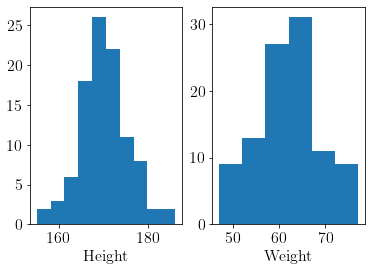

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量

plt.rc('font', size=16)
plt.rc('font', family="SimHei")
plt.subplot(121)
ps = plt.hist(high, 10)# 画图并返回频数表ps
plt.xlabel("Height")
print("身高的频数表为：", ps)
plt.subplot(122)
ps = plt.hist(weight, 6)# 画图并返回频数表ps
plt.xlabel("Weight")
print("体重的频数表为：", ps)
plt.show()

#### 2.3.2箱线图

先介绍**样本分位数**.
**定义9** 设有容量为 $n$ 的样本观测值 $x_{1}, x_{2}, \cdots, x_{n}$, 样本 $p$ 分位数 $(0<$ $p<1$ ) 记为 $x_{p}$, 它具有以下的性质:
(1) 至少有 $n p$ 个观测值小于或等于 $x_{p}$;
(2) 至少有 $n(1-p)$ 个观测值大于或等于 $x_{p}$.
样本 $p$ 分位数可按以下法则求得. 将 $x_{1}, x_{2}, \cdots, x_{n}$ 按自小到大的次序排列成 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$.
$$
x_{p}= \begin{cases}x_{([n p]+1)}, & n p \text { 不是整数, } \\ \frac{1}{2}\left[x_{(n p)}+x_{(n p+1)}\right], & n p \text { 是整数. }\end{cases}
$$
特别地, 当 $p=0.5$ 时, $0.5$ 分位数 $x_{0.5}$ 也记为 $Q_{2}$ 或 $M$, 称为样本中位数, 即有
$$
x_{0.5}= \begin{cases}x_{([n / 2]+1)}, & n \text { 是奇数, } \\ \frac{1}{2}\left[x_{(n / 2)}+x_{(n / 2+1)}\right], & n \text { 是偶数. }\end{cases}
$$
当 $n$ 是奇数时, 中位数 $x_{0.5}$ 就是 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$ 这一数组最中间的一个 数; 而当 $n$ 是偶数时, 中位数 $x_{0.5}$ 就是 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$ 这一数组中最中间两个数的平均值.
$0.25$ 分位数 $x_{0.25}$ 称为**第一四分位数**, 又记为 $Q_{1} ; 0.75$ 分位数 $x_{0.75}$ 称为**第三四分位数**, 又记为 $Q_{3} . x_{0.25}, x_{0.5}, x_{0.75}$ 在统计中是很有用的.

下面介绍**箱线图**.
数据集的箱线图是由箱子和直线组成的图形, 它是基于以下 5 个数的图形概 括: 最小值 Min, 第一四分位数 $Q_{1}$, 中位数 $M$, 第三四分位数 $Q_{3}$ 和最大值 Max. 它的做法如下.
(1) 画一水平数轴, 在轴上标上 Min, $Q_{1}, M, Q_{3}$, Max. 在数轴上方画一个上、 下侧平行于数轴的矩形箱子, 箱子的左右两侧分别位于 $Q_{1}, Q_{3}$ 的上方, 在 $M$ 点的上方画一条垂直线段, 线段位于箱子内部.
(2) 自箱子左侧引一条水平线直至最小值 Min; 在同一水平高度自箱子右侧引一条水平线直至最大值 Max. 这样就将箱线图做好了. 箱线图也可以沿垂直数轴来做. 从箱线图可以形象地看出数据集的以下重要性质.
(i) 中心位置: 中位数所在的位置就是数据集的中心.
(ii) 散布程度: 全部数据都落在 $[\mathrm{Min}, \mathrm{Max}]$ 之内, 在区间 $\left[\mathrm{Min}, Q_{1}\right],\left[Q_{1}, M\right]$, $\left.M, Q_{3}\right],\left[Q_{3}, \operatorname{Max}\right]$ 上的数据个数各占 $1 / 4$. **区间较短时, 表示落在该区间的点较集中, 反之较为分散.**
(iii) 关于对称性: 若中位数位于箱子的中间位置, 则数据分布较为对称. 又若 Min 离 $M$ 的距离较 Max 离 $M$ 的距离大, 则表示数据分布向左倾斜, 反之表示数据向右倾斜, 且能看出分布尾部的长短.

pyplot 中画箱线图的命令为 boxplot, 其基本调用格式为
boxplot(x, notch=None, sym=None, vert=None, whis=None, positions= None, widths=None)
其中, x 为输入的数据; notch 设置是否创建有凹口的箱盒; sym 设置异常点的颜色和形状, 例如, sym='gx' 设置异常点为绿色, 形状为 “ x "; vert 设置为水平或垂直方向箱盒, whis 默认为 1.5 (whis*IQR), 见下面异常值的说明; positions 设置箱盒的 位置, widths 设置箱盒的宽度.

**例** 下面分别给出了 25 个男子和 25 个女子的肺活量数据 (以 $\mathrm{L}$ 计, 数据已经排过序)
女子组：2.7, 2.8, 2.9, 3.1, 3.1, 3.1, 3.2, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 4.0, 4.1, 4.2, 4.2;
男子组：4.1, 4.1, 4.3, 4.3, 4.5, 4.6, 4.7, 4.8, 4.8, 5.1, 5.3, 5.3, 5.3, 5.4, 5.4, 5.5, 5.6, 5.7, 5.8, 5.8, 6.0, 6.1, 6.3, 6.7, 6.7;

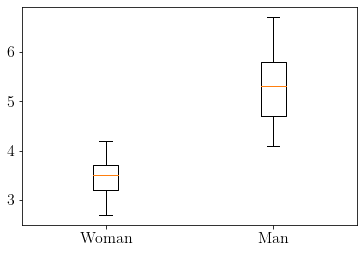

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([
    [2.7, 2.8, 2.9, 3.1, 3.1, 3.1, 3.2, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 4.0, 4.1, 4.2, 4.2],
    [4.1, 4.1, 4.3, 4.3, 4.5, 4.6, 4.7, 4.8, 4.8, 5.1, 5.3, 5.3, 5.3, 5.4, 5.4, 5.5, 5.6, 5.7, 5.8, 5.8, 6.0, 6.1, 6.3, 6.7, 6.7]
])
b = a.T # 转置成两列数据

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.boxplot(b, labels=['Woman', 'Man'])
plt.show()

箱线图特别适用于比较两个或两个以上数据集的性质, 为此, 将几个数据集的箱线图画在同一个图形界面上. 例如, 在上图中可以明显地看到男子的肺活量要比女子的肺活量大, 男子的肺活量较女子的肺活量分散.
在数据集中某一个观察值不寻常地大于或小于该数集中的其他数据, 称为**疑似异常值**. 疑似异常值的存在, 会对随后的计算结果产生不适当的影响. 检查疑似异常值并加以适当的处理是十分必要的.
第一四分位数 $Q_{1}$ 与第三四分位数 $Q_{3}$ 之间的距离: $Q_{3}-Q_{1}$ 记为 $=\mathrm{IQR}$, 称为**四分位数间距**. 若数据小于 $Q_{1}-1.5 \mathrm{IQR}$ 或大于 $Q_{3}+1.5 \mathrm{IQR}$, 就认为它是疑似异常值.

**例** (续例身高体重) 画身高和体重的箱线图.

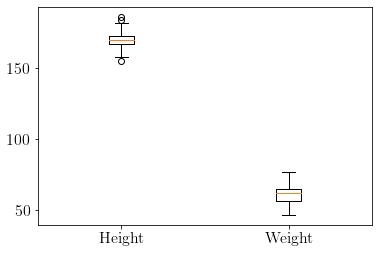

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量
highweight = np.hstack([high, weight]) # 构造两列数组

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.boxplot(highweight, labels=['Height', 'Weight'])
plt.show()

所画的身高和体重的箱线图如上图所示. 从箱线图可以看出身高有异常数据.

#### 2.3.3经验分布函数
设 $X_{1}, X_{2}, \cdots, X_{n}$ 是总体 $F$ 的一个样本, 用 $S(x)(-\infty<x<+\infty)$ 表示 $X_{1}, X_{2}, \cdots, X_{n}$ 中不大于 $x$ 的随机变量的个数. 定义**经验分布函数** $F_{n}(x)$ 为
$$
F_{n}(x)=\frac{1}{n} S(x), \quad-\infty<x<+\infty .
$$
对于一个样本值, 那么经验分布函数 $F_{n}(x)$ 的观察值是很容易得到的 $\left(F_{n}(x)\right.$ 的观察值仍以 $F_{n}(x)$ 表示).
一般地, 设 $x_{1}, x_{2}, \cdots, x_{n}$ 是总体 $F$ 的一个容量为 $n$ 的样本值. 先将 $x_{1}, x_{2}, \cdots$, $x_{n}$ 按自小到大的次序排列, 并重新编号, 设为
$$
x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)} .
$$
则经验分布函数 $F_{n}(x)$ 的观察值为
$$
F_{n}(x)= \begin{cases}0, & x<x_{(1)}, \\ \frac{k}{n}, & x_{(k)} \leqslant x<x_{(k+1)}, \quad k=1,2, \cdots, n-1, \\ 1, & x \geqslant x_{(n)} .\end{cases}
$$
对于经验分布函数 $F_{n}(x)$, 格里汶科 (Glivenko) 在 1933 年证明了, 当 $n \rightarrow+\infty$ 时 $F_{n}(x)$ **以概率 1 一致收敛于**分布函数 $F(x)$. 因此, 对于任一实数 $x$, 当 $n$ 充分大时, 经验分布函数的任一个观察值 $F_{n}(x)$ 与总体分布函数 $F(x)$ 只有微小的差别, 从而在实际中可当作 $F(x)$ 来使用.

**例** (续例身高体重) 画出体重的经验分布函数图形.

(array([0.02, 0.04, 0.09, 0.12, 0.16, 0.19, 0.29, 0.36, 0.47, 0.49, 0.63,
       0.7 , 0.8 , 0.84, 0.88, 0.9 , 0.93, 0.94, 0.97, 1.  ]), array([47. , 48.5, 50. , 51.5, 53. , 54.5, 56. , 57.5, 59. , 60.5, 62. ,
       63.5, 65. , 66.5, 68. , 69.5, 71. , 72.5, 74. , 75.5, 77. ]), [<matplotlib.patches.Polygon object at 0x00000246440C3F88>])


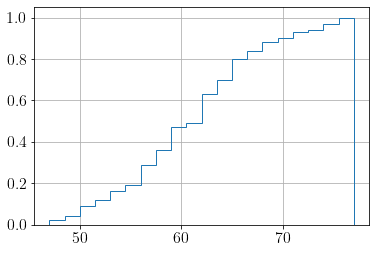

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

weight = data[:, 1::2] # 提取偶数列体重
weight = np.reshape(weight, (-1, 1)) # 转换为列向量

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
h = plt.hist(weight, 20, density=True, histtype='step', cumulative=True)
print(h)
plt.grid()
plt.show()

#### 2.3.4Q-Q 图
Q-Q 图 (quantile-quantile plot) 是检验**拟合优度**的好方法, **目前在国外被广泛使用**, 它的图示方法简单直观, 易于使用.
对于一组观察数据 $x_{1}, x_{2}, \cdots, x_{n}$, 利用参数估计方法确定了分布模型的参数 $\theta$ 后, 分布函数 $F(x ; \theta)$ 就知道了, 现在我们希望知道观测数据与分布模型的拟合效果如何. 如果拟合效果好, 观测数据的经验分布就应当非常接近分布模型的理论分布, 而经验分布函数的分位数自然也应当与分布模型的理论分位数近似相等. Q-Q 图的基本思想就是基于这个观点, 将经验分布函数的分位数点和分布模型的理论分位数点作为一对数组画在直角坐标图上, 就是一个点, $n$ 个观测数据对应 $n$ 个点, 如果这 $n$ 个点看起来像一条直线, 说明观测数据与分布模型的拟合效果很好, 以下给出计算步骤.
**判断观测数据 $x_{1}, x_{2}, \cdots, x_{n}$ 是否来自分布 $F(x)$**, $\mathrm{Q}-\mathrm{Q}$ 图的计算步骤如下:
(1) 将 $x_{1}, x_{2}, \cdots, x_{n}$ 依大小顺序排列成 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$;
(2) 取 $y_{i}=F^{-1}((i-1 / 2) / n), i=1,2, \cdots, n$;
(3) 将 $\left(y_{i}, x_{(i)}\right), i=1,2, \cdots, n$, 这 $n$ 个点画在直角坐标图上;
(4) 如果这 $n$ 个点看起来旺一条 $45^{\circ}$ 角的直线, 从 $(0,0)$ 到 $(1,1)$ 分布, 我们就相信 $x_{1}, x_{2}, \cdots, x_{n}$ 拟合分布 $F(x)$ 的效果很好.

**例** 对于往例身高数据, 如果它们来自正态分布, 求该正态分布的参数, 试画出它们的 Q-Q 图, 判断拟合效果.

**解**
(1) 采用**矩估计方法**估计参数的取值. 先从所给的数据算出样本均值和标准差
$$
\bar{x}=170.25, \quad s=5.3747
$$
正态分布 $N\left(\mu, \sigma^{2}\right)$ 中参数的估计值为 $\hat{\mu}=170.25, \hat{\sigma}=5.3747$.
(2) 画 Q-Q 图.
 (i) 将观测数据记为 $x_{1}, x_{2}, \cdots, x_{100}$, 并依从小到大顺序排列为 $x_{(1)} \leqslant x_{(2)} \leqslant$ $\cdots \leqslant x_{(100)}$.
 (ii) 取 $y_{i}=F^{-1}((i-1 / 2) / n), i=1,2, \cdots, 100$, 这里 $F^{-1}(x)$ 是参数 $\mu=170.25$, $\sigma=5.3747$ 的正态分布函数的反函数.
 (iii) 将 $\left(y_{i}, x_{(i)}\right)(i=1,2, \cdots, 100)$ 这 100 个点画在直角坐标系上, 如下图所示.
 (iv) 这些点看起来接近一条 $45^{\circ}$ 角的直线, 说明拟合结果较好.

[170.25, 5.374709294464213]


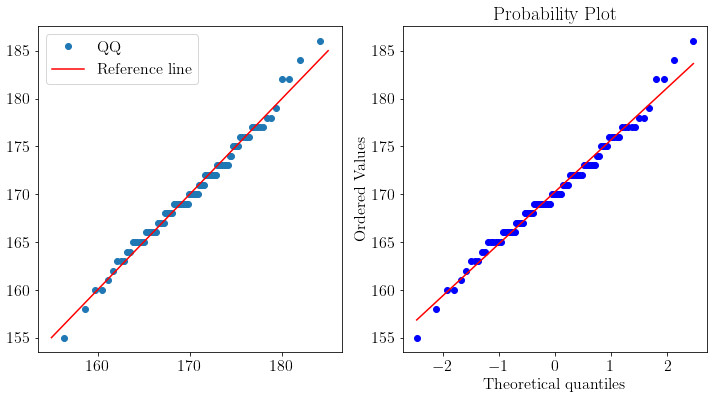

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2].flatten() # 提取奇数列身高并按行展开
mu = np.mean(high)
s = np.std(high)
print([mu, s])
sorthigh = np.sort(high) # 按从小到大排序
n = len(sorthigh)
xi = (np.arange(1, n+1)-1/2)/n
yi = norm.ppf(xi, mu, s) # ppf: Percent point function (inverse of `cdf`) at q of the given RV.

plt.figure(figsize=(12, 6))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False) # 用来正常显示负号
plt.subplot(121)
plt.plot(yi, sorthigh, 'o', label='QQ')
plt.plot([155, 185], [155, 185], 'r-', label='Reference line')
plt.legend()
plt.subplot(122)
res = probplot(high, plot=plt)
plt.show()

## 3.常见分布及其他

### 3.1连续概率分布

In [ ]:
from scipy import stats

d = [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]
print(d)

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'weibull_max', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semicirc

### 3.2离散概率分布

In [ ]:
from scipy import stats
d = [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)]
print(d)

['binom', 'bernoulli', 'betabinom', 'nbinom', 'geom', 'hypergeom', 'nhypergeom', 'logser', 'poisson', 'planck', 'boltzmann', 'randint', 'zipf', 'zipfian', 'dlaplace', 'skellam', 'yulesimon', 'nchypergeom_fisher', 'nchypergeom_wallenius']


### 3.3伽马分布示意图
$$
f(x, \beta, \alpha)=\frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, x>0
$$

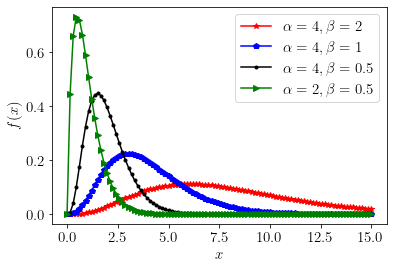

In [ ]:
from matplotlib.pyplot import plot, legend, xlabel, ylabel, savefig, show, rc
from scipy.stats import gamma

from numpy import linspace
x=linspace(0,15,100)
rc('font',size=15)
rc('text', usetex=True)

plot(x,gamma.pdf(x,4,0,2),'r*-',label=r"$\alpha=4, \beta=2$")
plot(x,gamma.pdf(x,4,0,1),'bp-',label=r"$\alpha=4, \beta=1$")
plot(x,gamma.pdf(x,4,0,0.5),'.k-',label=r"$\alpha=4, \beta=0.5$")
plot(x,gamma.pdf(x,2,0,0.5),'>g-',label=r"$\alpha=2, \beta=0.5$")

legend()
xlabel('$x$')
ylabel('$f(x)$')
#savefig("figure2_46.png",dpi=500);

show()

### 3.4正态分布示意图
$$
f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2}\right)
$$

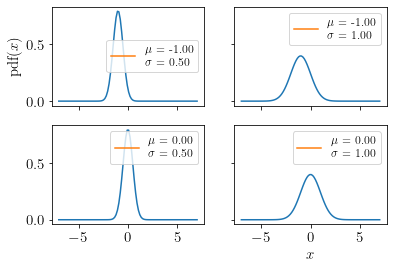

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
#%matplotlib tk
%matplotlib inline

mu0 = [-1, 0]
s0 = [0.5, 1]
x = np.linspace(-7, 7, 100)
plt.rc('font',size=15)
plt.rc('text', usetex=True)
plt.rc('axes',unicode_minus=False)

f, ax = plt.subplots(len(mu0), len(s0), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        mu = mu0[i]
        s = s0[j]
        y = norm(mu, s).pdf(x)

        ax[i,j].plot(x, y)
        ax[i,j].plot(1,0,label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu,s))
        ax[i,j].legend(fontsize=12)

ax[1,1].set_xlabel('$x$')
ax[0,0].set_ylabel('pdf($x$)')
# plt.savefig('figure2_47.png')

plt.show()

###  3.5二项分布示意图

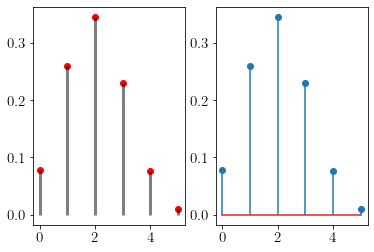

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p=5, 0.4

x=np.arange(6)
y=binom.pmf(x,n,p)

plt.subplot(121)
plt.plot(x, y, 'ro')
plt.vlines(x, 0, y, 'k', lw=3, alpha=0.5)
#vlines(x, ymin, ymax)画竖线图
#lw设置线宽度，alpha设置图的透明度

plt.subplot(122)
plt.stem(x, y, use_line_collection=True)
plt.show()

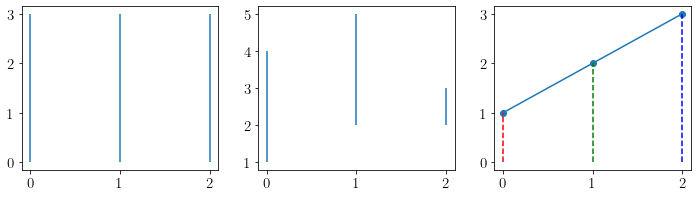

In [ ]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
x = range(3)
plt.vlines(x, 0, 3)

plt.subplot(132)
plt.vlines(x, [1, 2, 3], [4, 5, 2])

plt.subplot(133)
plt.plot(x, range(1, 4), marker='o')
plt.vlines(x, [0, 0, 0], range(1, 4), colors=['r', 'g', 'b'],
           linestyles='dashed')
plt.show()

### 3.6随机变量概率计算

In [ ]:
from scipy.stats import norm
from scipy.optimize import fsolve

print("p=",norm.cdf(6,3,5)-norm.cdf(2,3,5))

f = lambda c: norm.cdf(2*c,3,5)-norm.cdf(-3*c,3,5)-0.6
print("c=", fsolve(f,0))

p= 0.3050065916890295
c= [2.29103356]


### 3.7非线性方程求解
$$ x^3+1.1 x^2+0.x-1.4 = 0 $$

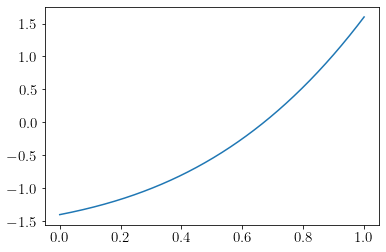

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**3+1.1*x**2+0.9*x-1.4

x = np.linspace(0,1,500)

y = f(x)

plt.plot(x,y)
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def binary_search(f, eps, a, b):  #二分法函数
    c=(a+b)/2
    while np.abs(f(c))>eps:
        if f(a)*f(c)<0: b=c
        else: a=c
        c=(a+b)/2
    return c

def newton_iter(f, eps, x0, dx = 1E-8):  #牛顿迭代法函数
    def diff(f, dx=dx):   #求数值导数函数
        return lambda x: (f(x+dx)-f(x-dx))/(2*dx)

    df=diff(f,dx)

    x1=x0-f(x0)/df(x0)
    while np.abs(x1-x0)>=eps:
        x1, x0=x1-f(x1)/df(x1), x1
    return x1

f=lambda x: x**3+1.1*x**2+0.9*x-1.4
print("二分法求得的根为：", binary_search(f,1E-6,0,1))
print("牛顿迭代法求得的根为：",newton_iter(f,1E-6,0))
print("直接调用SciPy求得的根为：",fsolve(f,0))

二分法求得的根为： 0.6706571578979492
牛顿迭代法求得的根为： 0.6706573107258097
直接调用SciPy求得的根为： [0.67065731]


### 3.8上分位数计算

上alpha分位数分别为 [3.09023231 2.5758293  2.32634787 1.95996398 1.64485363 1.28155157]


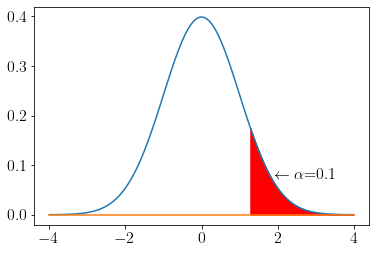

In [ ]:
from scipy.stats import norm
from pylab import plot,fill_between,show,text,savefig,rc
from numpy import array, linspace, zeros

alpha=array([0.001, 0.005, 0.01, 0.025, 0.05, 0.10])

za=norm.ppf(1-alpha,0,1)  #求上alpha分位数
print("上alpha分位数分别为", za)

x=linspace(-4, 4, 100)
y=norm.pdf(x, 0, 1)

rc('font',size=16)
rc('text',usetex=True)
plot(x,y)  #画标准正态分布密度曲线

x2=linspace(za[-1],4,100)
y2=norm.pdf(x2)
y1=[0]*len(x2)
fill_between(x2, y1, y2, color='r')  #y1,y2对应的点之间填充

plot([-4,4],[0,0])  #画水平线
text(1.9, 0.07, "$\\leftarrow\\alpha$=0.1")  #标注
show()

### 3.9随机变量数字特征计算及应用

In [ ]:
from scipy.stats import binom

n, p=20, 0.8
mean, variance = binom.stats(n,p)
print("期望和方差分布为：",mean, variance)

from scipy.stats import binom
n, p=20, 0.8
mean, variance, skewness, kurtosis=binom.stats(n, p, moments='mvsk')

print("所求的数字特征为：", mean, variance, skewness, kurtosis)

期望和方差分布为： 16.0 3.1999999999999993
所求的数字特征为： 16.0 3.1999999999999993 -0.33541019662496857 0.012500000000000015


### 3.10概率模型
最佳更换周期

In [ ]:
from scipy.integrate import quad
from numpy import exp, sqrt, pi, abs
a=80
b=0.02
BD=a/b
mu=4000
s=100

fun = lambda x: x*exp(-(x-mu)**2/(2*s**2))/sqrt(2*pi)/s   #定义积分的被积函数

I  = 0
x1 = 0
x2 = 10000

while abs(I- a/b)>1E-16:
    c=(x1+x2)/2
    I=quad(fun, -1000,c)[0] #由3sigma准则这里积分下限取为-10000,取零效果一样
    if I>BD:
        x2=c
    else:
        x1=c

print("最佳更换周期为：", c)

最佳更换周期为： 5000.0


### 3.11数值积分

In [ ]:
import numpy as np
from scipy.integrate import quad

def trapezoid(f, n, a, b):    #定义梯形公式的函数
    xi = np.linspace(a, b, n)
    h = (b-a)/(n-1)
    return h*(np.sum(f(xi))-(f(a)+f(b))/2)

def simpson(f, n, a, b):     #定义辛普森公式的函数
    xi, h = np.linspace(a, b, 2*n+1), (b-a)/(2.0*n)
    xe = [f(xi[i]) for i in range(len(xi)) if i%2==0]
    xo = [f(xi[i]) for i in range(len(xi)) if i%2!=0]
    return h*(2*np.sum(xe)+4*np.sum(xo)-f(a)-f(b))/3.0

a=0
b=1
n=1000
f = lambda x: np.sin(np.sqrt(np.cos(x)+x**2))

print("梯形积分I1=", trapezoid(f, n, a, b))
print("辛普森积分I2=", simpson(f, n, a, b))
print("SciPy积分I3=", quad(f, a, b))


梯形积分I1= 0.8803354297105352
辛普森积分I2= 0.8803354170924643
SciPy积分I3= (0.8803354170924643, 9.773686494490445e-15)


In [ ]:
import numpy as np
from scipy.integrate import dblquad

f1=lambda y, x: x*y**2  #第一个被积函数
print("I1：", dblquad(f1, 0, 2, 0, 1))

f2=lambda y, x: np.exp(-x**2/2)*np.sin(x**2+y)
bd=lambda x: np.sqrt(1-x**2)
print("I2:", dblquad(f2, -1, 1, lambda x: -bd(x), bd))

I1： (0.6666666666666667, 7.401486830834377e-15)
I2: (0.5368603826989582, 3.696155159715886e-09)


In [ ]:
import numpy as np
from scipy.integrate import tplquad
f = lambda z, y, x: z*np.sqrt(x**2+y**2+1)
ybd = lambda x: np.sqrt(2*x-x**2)
print("I=", tplquad(f, 0, 2, lambda x: -ybd(x),ybd, 0, 6))

I= (87.45019779526699, 8.742462398458883e-08)


## 4.代码快速查找

### 均值,中位数,极差,方差,标准差

In [ ]:
from numpy import reshape, hstack, mean, median, ptp, var, std, cov, corrcoef
import pandas as pd
import os

df = pd.read_excel(os.path.join('data',"Pdata4_6_1.xlsx"),header=None)
a=df.values  #提取数据矩阵
h=a[:,::2]  #提取奇数列身高
w=a[:,1::2]  #提取偶数列体重

h=reshape(h,(-1, 1)) #转换成列向量，自动计算行数
w=reshape(w,(-1, 1)) #转换成列向量，自动计算行数

hw=hstack([h,w])  #构造两列的数组

print([mean(h),median(h),ptp(h),var(h),std(h)])  #计算均值,中位数,极差,方差,标准差
print("协方差为：{}\n相关系数为：{}".format(cov(hw.T)[0,1],corrcoef(hw.T)[0,1]))

[170.25, 170.0, 31, 28.8875, 5.374709294464213]
协方差为：16.982323232323235
相关系数为：0.4560968250128602


### 直方图

体重的频数： [ 9. 13. 27. 31. 11.  9.]
频数的区间： [47. 52. 57. 62. 67. 72. 77.]


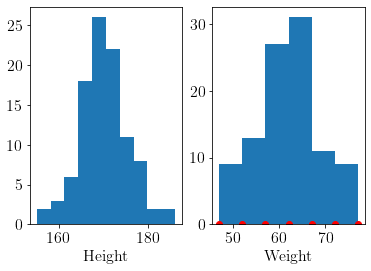

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
a=np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))

h=a[:,::2]
w=a[:,1::2]
h=np.reshape(h,(-1,1))
w=np.reshape(w,(-1,1))

plt.rc('font',size=16)
# plt.rc('font',family="SimHei")

plt.subplot(121)
plt.xlabel("Height")
plt.hist(h,10) #只画直方图不返回频数表

plt.subplot(122)
ps = plt.hist(w,6)  #画图并返回频数表ps

# ps 第一个array是频数，
# ps 第二个列表是
plt.xlabel("Weight")
print("体重的频数：", ps[0])
print("频数的区间：", ps[1])

plt.plot(ps[1],np.zeros(7),'ro')
plt.show()

### 箱线图

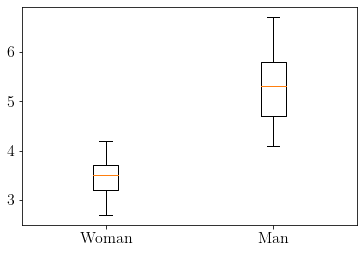

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a=np.loadtxt(os.path.join('data',"Pdata4_9.txt"))  #读入两行的数据
b=a.T  #转置成两列的数据

plt.rc('font',size=16)
plt.rc('font',family='SimHei')

plt.boxplot(b,labels=['Woman','Man'])
plt.show()

### 箱线图的异常点

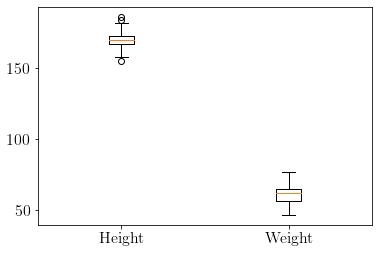

In [ ]:
import numpy as np
import os

import matplotlib.pyplot as plt
a=np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))  #读入两行的数据

h=a[:,::2]
w=a[:,1::2]

h=np.reshape(h,(-1,1))
w=np.reshape(w,(-1,1))
hw=np.hstack((h,w))

plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.boxplot(hw,labels=['Height', 'Weight'])
plt.show()

### 经验分布函数

hist cumulative = True

体重的累计频率： [0.02 0.04 0.09 0.12 0.16 0.19 0.29 0.36 0.47 0.49 0.63 0.7  0.8  0.84
 0.88 0.9  0.93 0.94 0.97 1.  ]
累计频率的区间： [47.  48.5 50.  51.5 53.  54.5 56.  57.5 59.  60.5 62.  63.5 65.  66.5
 68.  69.5 71.  72.5 74.  75.5 77. ]


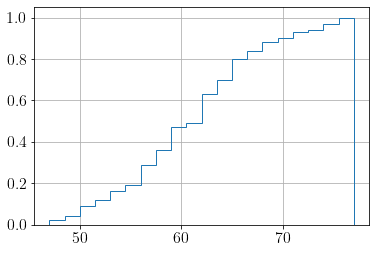

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.loadtxt(os.path.join('data', "Pdata4_6_2.txt"))  #读入两行的数据
w = a[:, 1::2]
w = np.reshape(w, (-1, 1))

plt.rc('font', size=16)
ps = plt.hist(w, bins = 20, density = True, histtype='step', cumulative = True)
# density  = True, 返回密度
# cumulative = True，则计算累计
#print(h);
print("体重的累计频率：", ps[0])
print("累计频率的区间：", ps[1])
plt.grid()
plt.show()

### QQ图 参数估计检验
对比经验分布函数和估计得到的理论分布参数
和 y = x 直线接近，说明估计的参数合适。

[170.25, 5.374709294464213]


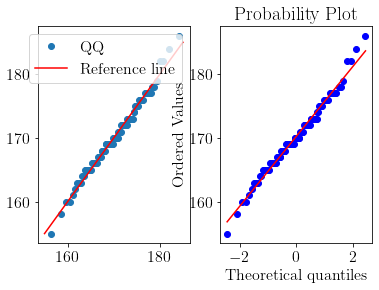

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import os

a=np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))  #读入两行的数据
h=a[:,::2]
h=h.flatten()

mu=np.mean(h)
s=np.std(h)
print([mu,s])

sh=np.sort(h) #按从小到大排序
n=len(sh)
xi=(np.arange(1,n+1)-1/2)/n
yi=norm.ppf(xi,mu,s)

plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus=False) #用来正常显示负号

plt.subplot(121)
plt.plot(yi, sh, 'o', label='QQ')
plt.plot([155,185],[155,185],'r-',label='Reference line')
plt.legend()

plt.subplot(122)
res = probplot(h,plot=plt)

plt.show()

### 均值和方差的极大似然估计

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

a = np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))  #读入两行的数据
h = a[:,::2]
h = h.flatten()

mu = np.mean(h)
s = np.std(h)

print("样本均值和标准差为：",[mu,s])
print("极大似然估计值为：", norm.fit(h))

样本均值和标准差为： [170.25, 5.374709294464213]
极大似然估计值为： (170.25, 5.374709294464213)


### 置信区间

In [ ]:
import numpy as np
from scipy.stats import t

a = np.array([506,  508,  499,  503,  504,  510,  497,  512, 514,  505,  493,  496,  506,  502,  509,  496])

# ddof取值为1时，标准偏差除的是(N-1)；NumPy中的std计算默认是除以N
mu = a.mean()
s = a.std(ddof = 1)  #计算均值和标准差

print(mu, s)

alpha = 0.05
n = len(a)
val = (mu-s/np.sqrt(n)*t.ppf(1-alpha/2,n-1),mu+s/np.sqrt(n)*t.ppf(1-alpha/2,n-1))

print("置信区间为：",val)

503.75 6.202150164795002
置信区间为： (500.44510746243924, 507.05489253756076)


### 假设检验 z检验


In [ ]:
############ 手工写z检验
from scipy.stats import norm


# 计算统计量 z
z =  (a.mean() - 0.5)*(len(a))**0.5/0.015


# 计算拒绝域边界
alpha = 0.05
z_alpha2  = norm.ppf(1 - alpha/2, 0,1)

print('统计量z：', z, '拒绝域边界：',z_alpha2)

if z > z_alpha2:
    print('拒绝原假设')
else:
    print('接受原假设')

### 通过 p value 来判断

z =  (a.mean() - 0.5)*(len(a))**0.5/0.015
print(z)

p = 2*norm.sf(1.96)
print(p)

p2 = 2*norm.sf(z)
print(p2)

if p2 < 0.05:   #  值小于0.05 就
    print('拒绝原假设')
else:
    print('接受原假设')

统计量z： 134200.0 拒绝域边界： 1.959963984540054
拒绝原假设
134200.0
0.04999579029644087
0.0
拒绝原假设


In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

sigma=0.015
a = np.array([0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])

tstat1, pvalue = ztest(a, value = 0.5) #计算T统计量的观测值及p值

tstat2 = tstat1*a.std(ddof=1)/sigma  #转换为Z统计量的观测值

print('t值为：',round(tstat1,4))

print('z值为：',round(tstat2,4)); print('t test的 p值为:',round(pvalue,4))


if  pvalue < 0.05:
    print('拒绝原假设')
else:
    print('不拒绝原假设')

t值为： 3.5849
z值为： 2.2444
t test的 p值为: 0.0003
拒绝原假设


### t 检验

In [ ]:
from scipy.stats import norm
import numpy as np

a = np.array([3.25, 3.27, 3.24, 3.26, 3.24])
a.std(ddof = 1)

0.013038404810405173

In [ ]:
############ 手工写 t检验
from scipy.stats import t
import numpy as np

a = np.array([3.25, 3.27, 3.24, 3.26, 3.24])

# 计算统计量 t
n = len(a)
t_hat =  (a.mean() - 3.25)*n**0.5/a.std(ddof = 1)
print('t 统计量 ', t_hat)


# 计算拒绝域边界
alpha = 0.01
t_alpha2  = t.ppf(1 - alpha/2, n-1)
print(t_alpha2)

if t_hat < t_alpha2:
    print('接受假设')
else:
    print('拒绝假设')

t 统计量  0.34299717028498317
4.604094871415897
接受假设


In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

a=np.array([3.25, 3.27, 3.24, 3.26, 3.24])

tstat, pvalue = ztest(a,value=3.25)

print('检验统计量为：',tstat); print('p值为:',pvalue)

if pvalue > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

检验统计量为： 0.34299717028498317
p值为: 0.7316005889599273
接受假设


### 单边 t检验

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest


a = np.array([16, 25, 21, 20, 23, 21, 19, 15, 13,
            23, 17, 20, 29, 18, 22, 16, 22])
# ztest 默认是双边检验。但是如果考虑小于某些值不好，而超过某些值好的话，应该用单边。
# alternative 默认值 'two-sided'
tstat, pvalue = ztest(a,value=21, alternative='smaller')  #


print('检验统计量为：',tstat); print('p值为:',pvalue)

if pvalue > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

检验统计量为： -1.0348266239966402
p值为: 0.15037494342517732
接受假设


### 两个总体均值的假设检验

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ttest_ind

a = np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
b = np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201])

tstat, pvalue, df = ttest_ind(a, b, value=0)

print('检验统计量为：', tstat)
print('p值为:', pvalue)
print('自由度为：', df)

if pvalue > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

检验统计量为： 3.8781376258607807
p值为: 0.0013338206615241036
自由度为： 16.0
拒绝假设


### 非参数检验

In [ ]:
import numpy as np
import scipy.stats as ss

bins = np.arange(1, 8)
mi = np.array([36, 23, 29, 31, 34, 60, 25])

n = mi.sum()
p = np.ones(7)/7

cha = (mi-n*p)**2/(n*p)
st = cha.sum()
bd = ss.chi2.ppf(0.95, len(bins)-1) #计算上alpha分位数

print("统计量为：{}，临界值为：{}".format(st, bd))


if st < bd:
    print('接受假设')
else:
    print('拒绝假设')

统计量为：26.941176470588236，临界值为：12.591587243743977
拒绝假设


均值为： 15.078
标准差为： 0.428154177837844
最大值为： 15.9
最小值为： 14.2
各区间的频数为： [ 8.  6. 10. 10.  4. 12.] 
小区间端点值为： [14.2    14.625  14.8375 15.05   15.2625 15.475  15.9   ]
各小区取值的理论概率为： [0.14502086 0.14213474 0.18677335 0.19280761 0.15636145 0.17690199]
统计量为：3.2998742691953424，临界值为：7.814727903251179
接受假设


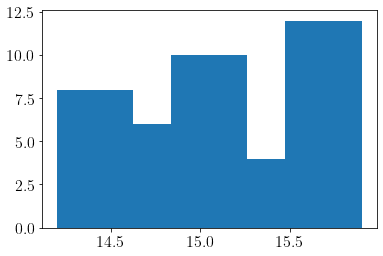

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import os

n = 50
k = 8 #初始小区间划分的个数
a = np.loadtxt(os.path.join('data',"Pdata4_20.txt"))
a = a.flatten()
mu = a.mean()
s = a.std()
print("均值为：", mu); print("标准差为：", s)
print("最大值为：",a.max()); print("最小值为：",a.min())

bins = np.array([14.2, 14.625, 14.8375, 15.05, 15.2625, 15.475, 15.9])
h = plt.hist(a,bins)
f = h[0]; x=h[1] #提取各个小区间的频数和小区间端点的取值
print("各区间的频数为：",f,"\n小区间端点值为：",x)

p = ss.norm.cdf(x, mu, s)  #计算各个分点分布函数的取值
dp = np.diff(p)  #计算各小区间取值的理论概率
dp[0] = ss.norm.cdf(x[1], mu, s)  #修改第一个区间的概率值
dp[-1] = 1-ss.norm.cdf(x[-2], mu, s)  #修改最后一个区间的概率值

print("各小区取值的理论概率为：",dp)
st = sum(f**2/(n*dp)) - n  #计算卡方统计量的值

bd = ss.chi2.ppf(0.95,k-5) #计算上alpha分位数
print("统计量为：{}，临界值为：{}".format(st, bd))

if st < bd:
    print('接受假设')
else:
    print('拒绝假设')

In [ ]:
import numpy as np
import os
import scipy.stats as ss

a = np.loadtxt(os.path.join('data', "Pdata4_6_2.txt"))
w = a[:, 1::2]
w = w.flatten()

mu = w.mean()
s = w.std(ddof=1)  #计算样本均值和标准差
print("均值和标准差分别为：", (mu, s))

statVal, pVal = ss.kstest(w, 'norm', (mu, s))
print("统计量和P值分别为：", [statVal, pVal])

if pVal > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

均值和标准差分别为： (61.27, 6.892911012208283)
统计量和P值分别为： [0.05904454095634937, 0.8561177331775733]
接受假设


In [ ]:
from scipy.sparse.linalg import eigs
import numpy as np

a = np.array([[  1, 1/2, 5,   5,   3],
              [  2,   1, 7,   7,   5],
              [1/5, 1/7, 1, 1/2, 1/3],
              [1/5, 1/7, 2,   1, 1/2],
              [1/3, 1/5, 3,   2,   1]])
L, V = eigs(a, 1)
print(V)
CR = (L-5)/4/1.12  #计算矩阵A的一致性比率
W = V/sum(V)
print("最大特征值为：", L)
print("最大特征值对应的特征向量W=\n", W)
print("CR=", CR)

B1 = np.array([
    [1, 1/3, 1/2],
    [3,   1, 1/2],
    [2,   2,   1]
])
L1, P1 = eigs(B1, 1)
P1 = P1/sum(P1)
print("P1=", P1)

B2 = np.array([
    [  1,   3, 2],
    [1/3,   1, 2],
    [1/2, 1/2, 1]
])
t2, P2 = eigs(B2, 1)
P2 = P2/sum(P2)
print("P2=", P2)

B3 = np.array([
    [  1,   4, 3],
    [1/4,   1, 2],
    [1/3, 1/2, 1]
])
t3, P3 = eigs(B3, 1)
P3 = P3/sum(P3)
print("P3=", P3)

B4 = np.array([
    [  1,   3, 2],
    [1/3,   1, 2],
    [1/2, 1/2, 1]
])
t4, P4 = eigs(B4, 1)
P4 = P4/sum(P4)
print("P4=", P4)

B5 = np.array([
    [  1, 2,   3],
    [1/2, 1, 1/2],
    [1/3, 2,   1]
])
t5, P5 = eigs(B5, 1)
P5 = P5/sum(P5)
print("P5=", P5)

K = np.hstack([P1, P2, P3, P4, P5])@W  #矩阵乘法
print("K=", K)

[[0.49555931+0.j]
 [0.83255221+0.j]
 [0.08399158+0.j]
 [0.11865768+0.j]
 [0.20035857+0.j]]
最大特征值为： [5.09758844+0.j]
最大特征值对应的特征向量W=
 [[0.28626525+0.j]
 [0.48093287+0.j]
 [0.04851865+0.j]
 [0.0685439 +0.j]
 [0.11573932+0.j]]
CR= [0.02178313+0.j]
P1= [[0.16765631+0.j]
 [0.34873919+0.j]
 [0.4836045 +0.j]]
P2= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P3= [[0.63009766-0.j]
 [0.21844266-0.j]
 [0.15145968-0.j]]
P4= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P5= [[0.54721643+0.j]
 [0.18970934+0.j]
 [0.26307422+0.j]]
K= [[0.44258285+0.j]
 [0.27694046+0.j]
 [0.28047669+0.j]]
